***Alumna:*** Nataly Lucía Murillo Mosquera

***Cédula:*** 1003970969

# *Punto A*

In [ ]:
#Librerías

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


In [ ]:
#Creación del Dataframe

datos = [
    {'Días': 1, 'IPMH': 464}, 
    {'Días': 2, 'IPMH': 494},
    {'Días': 3, 'IPMH': 532},
    {'Días': 4, 'IPMH': 552},
    {'Días': 5, 'IPMH': 576},
    {'Días': 6, 'IPMH': 589}    
]

df = pd.DataFrame(datos)
print(df)

   Días  IPMH
0     1   464
1     2   494
2     3   532
3     4   552
4     5   576
5     6   589


In [ ]:
#Poducto de cada elemento de la columna IPMH por 0.002

error = [464*0.002, 494*0.002, 532*0.002, 552*0.002, 576*0.002, 589*0.002]

In [ ]:
#Número aleatorio del rango 2 por mil

a = np.random.uniform(low = -0.928, high = 0.928)
b = np.random.uniform(low = -0.988, high = 0.988)
c = np.random.uniform(low = -1.064, high = 1.064)
d = np.random.uniform(low = -1.104, high = 1.104)
e = np.random.uniform(low = -1.152, high = 1.152)
f = np.random.uniform(low = -1.178, high = 1.178)

In [ ]:
#Suma de columna del IPMH y los números aleatorios

m = np.array([a,b,c,d,e,f])
suma_columns = df['IPMH'] + m
suma_columns

0    463.898736
1    493.315070
2    531.482212
3    551.027506
4    576.618680
5    589.322500
Name: IPMH, dtype: float64

In [ ]:
Incertidumbre = [463.898736, 493.315070, 531.482212, 551.027506, 576.618680, 589.322500]

df['Incertidumbre_IPMH'] = Incertidumbre

In [ ]:
#Como por el paso anterior se crearon columnas de más, son eliminadas y luego se visualiza el DataFrame con una nueva columna

data = df.drop(columns = [463.8987361571023, 493.31506988464014, 531.4822118988114, 551.0275063789893, 576.6186802675817, 589.3225001108823, 'Incertidumbre'])
data

,Días,IPMH,Incertidumbre_IPMH
0,1,464,463.898736
1,2,494,493.315070
2,3,532,531.482212
3,4,552,551.027506
4,5,576,576.618680
5,6,589,589.322500


# *Punto B*

Text(0, 0.5, 'Incertidumbre_IPMH')

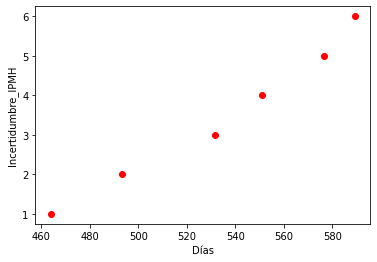

In [55]:
# Se crea un diagrama de dispersión Día vs IPMH(incertidumbre)
y = data['Días']
x = data['Incertidumbre_IPMH']

plt.scatter(x,y,color='red')
plt.xlabel('Días')
plt.ylabel('Incertidumbre_IPMH')

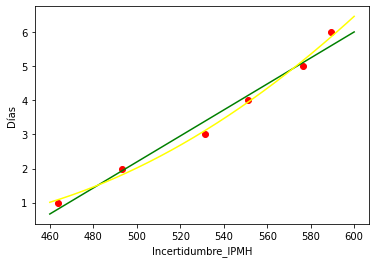

In [79]:
# Ajuste en varias curvas hasta un polinomio de grado 2
modelo1 = np.poly1d(np.polyfit(x, y, 1))
modelo2 = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(460, 600, 580)
plt.scatter(x,y,color='red')

# Líneas polinomiales 
plt.plot (polyline, modelo1(polyline), color = 'green')
plt.plot (polyline, modelo2(polyline), color = 'yellow')

plt.xlabel('Incertidumbre_IPMH')
plt.ylabel('Días')

plt.show()

#Esto se hace con el objetivo de ver qué curva se ajusta mejor a la dispersión

In [60]:
# Define la función para calcular el ajuste de la definición de r^2
def ajustado (x, y, grado):
    resultados = {}
    coef = np. polyfit (x, y, grado)
    p = np.poly1d(coef)
    yhat = p(x)
    ybar = np.sum(y) / len (y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    resultados ['r_al cuadrado'] = 1 - (((1- (ssreg/sstot)) * (len (y) - 1)) / (len (y) - grado - 1))
    return resultados

# R-cuadrado ajustado calculado de cada modelo
ajustado (x, y, 1)
ajustado (x, y, 2)

{'r_al cuadrado': 0.9894869770072218}

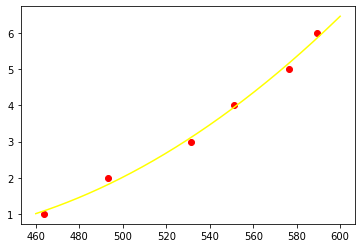

In [73]:
# Diagrama de dispersión con curva de modelo de polinomio de segundo grado
grado2 = np.poly1d(np.polyfit(x, y, 2))

polyline = np. linspace(460, 600, 580)
plt.scatter(x, y, color = 'red')

# Curva polinomial ajustada al diagrama de dispersión
plt.plot (polyline, modelo2 (polyline), color = 'yellow')
plt.show()

In [78]:
# Ecuación de la curva amarilla

print(modelo2)

           2
0.0001383 x - 0.1076 x + 21.24


La ecuación es: 0.0001383x^2 - 0.1076x + 21.24
